<a href="https://colab.research.google.com/github/jigneshraiyani/DeepLearning/blob/main/Weight_initialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Things not to do when initializing weight.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from sklearn.datasets import make_moons

In [20]:
x,y1 = make_moons(n_samples = 1000, noise= .05, random_state = 29)

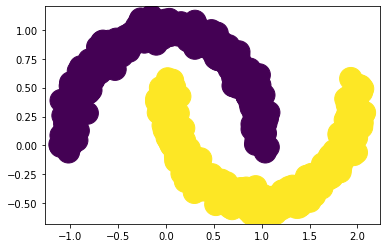

In [24]:
plt.scatter(x[: ,0], x[: ,1], c=y, s=500)
plt.show()

In [27]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [28]:
model = Sequential()
model.add(Dense(2, activation='sigmoid', input_dim = 2))
model.add(Dense(1, 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [31]:
initial_weight = model.get_weights()
initial_weight

[array([[-0.23324382, -0.06656909],
        [ 0.07776189,  0.21188211]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.77449834],
        [-0.74055517]], dtype=float32),
 array([0.], dtype=float32)]

###Assign constant weight - not much improvement

In [32]:
initial_weight[0] = np.ones(initial_weight[0].shape)*.5
initial_weight[1] = np.ones(initial_weight[1].shape)*.5
initial_weight[2] = np.ones(initial_weight[2].shape)*.5
initial_weight[3] = np.ones(initial_weight[3].shape)*.5

model.set_weights(initial_weight)

In [33]:
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics='accuracy' )


In [34]:
history = model.fit(x,y, epochs=100, validation_split=.2)

Epoch 1/100
25/25 [==============================] - 5s 15ms/step - loss: 0.8471 - accuracy: 0.5013 - val_loss: 0.8480 - val_accuracy: 0.4950
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.8300 - accuracy: 0.5013 - val_loss: 0.8311 - val_accuracy: 0.4950
Epoch 3/100
25/25 [==============================] - 0s 7ms/step - loss: 0.8142 - accuracy: 0.5013 - val_loss: 0.8157 - val_accuracy: 0.4950
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 0.8001 - accuracy: 0.5013 - val_loss: 0.8010 - val_accuracy: 0.4950
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7869 - accuracy: 0.5013 - val_loss: 0.7881 - val_accuracy: 0.4950
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7749 - accuracy: 0.5013 - val_loss: 0.7770 - val_accuracy: 0.4950
Epoch 7/100
25/25 [==============================] - 0s 7ms/step - loss: 0.7645 - accuracy: 0.5013 - val_loss: 0.7661 - val_accuracy: 0.4950
Epoch 8/100


3888/3888 [==============================] - 6s 1ms/step


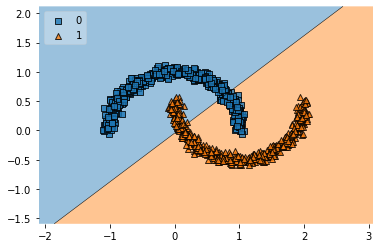

In [41]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x, y.astype('int'), clf=model, legend=2)

In [42]:
# Initilize weight with zero

initial_weight[0] = np.zeros(initial_weight[0].shape)
initial_weight[1] = np.zeros(initial_weight[1].shape)
initial_weight[2] = np.zeros(initial_weight[2].shape)
initial_weight[3] = np.zeros(initial_weight[3].shape)

model.set_weights(initial_weight)

model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics='accuracy' )
model.fit(x,y, epochs = 50, validation_split=.15)



Epoch 1/50
27/27 [==============================] - 1s 9ms/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6935 - val_accuracy: 0.4733
Epoch 2/50
27/27 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5047 - val_loss: 0.6935 - val_accuracy: 0.4733
Epoch 3/50
27/27 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.5047 - val_loss: 0.6934 - val_accuracy: 0.4733
Epoch 4/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6928 - accuracy: 0.5047 - val_loss: 0.6933 - val_accuracy: 0.4733
Epoch 5/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6924 - accuracy: 0.5047 - val_loss: 0.6931 - val_accuracy: 0.4733
Epoch 6/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6918 - accuracy: 0.5047 - val_loss: 0.6926 - val_accuracy: 0.4733
Epoch 7/50
27/27 [==============================] - 0s 5ms/step - loss: 0.6909 - accuracy: 0.5047 - val_loss: 0.6919 - val_accuracy: 0.4733
Epoch 8/50
27/27 [==

3888/3888 [==============================] - 6s 2ms/step


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


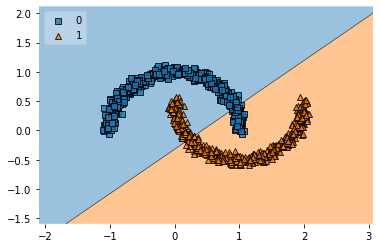

In [45]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x, y.astype('int') , clf= model, legend=2)

In [50]:
model = Sequential()
model.add(Dense(2, activation='relu', input_dim=2, kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 2)                 6         
                                                                 
 dense_9 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x, y1, epochs=50, validation_split = 0.2)


Epoch 1/50
25/25 [==============================] - 1s 11ms/step - loss: 0.6738 - accuracy: 0.5800 - val_loss: 0.6712 - val_accuracy: 0.5450
Epoch 2/50
25/25 [==============================] - 0s 7ms/step - loss: 0.6635 - accuracy: 0.5913 - val_loss: 0.6600 - val_accuracy: 0.6000
Epoch 3/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6543 - accuracy: 0.6438 - val_loss: 0.6492 - val_accuracy: 0.6700
Epoch 4/50
25/25 [==============================] - 0s 5ms/step - loss: 0.6451 - accuracy: 0.6975 - val_loss: 0.6396 - val_accuracy: 0.7150
Epoch 5/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6363 - accuracy: 0.7300 - val_loss: 0.6301 - val_accuracy: 0.7550
Epoch 6/50
25/25 [==============================] - 0s 5ms/step - loss: 0.6275 - accuracy: 0.7588 - val_loss: 0.6204 - val_accuracy: 0.8000
Epoch 7/50
25/25 [==============================] - 0s 5ms/step - loss: 0.6187 - accuracy: 0.8200 - val_loss: 0.6109 - val_accuracy: 0.8700
Epoch 8/50
25/25 [=

3888/3888 [==============================] - 6s 2ms/step


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


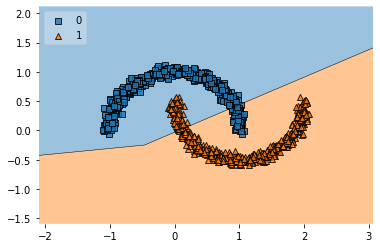

In [58]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x, y.astype('int') , clf= model, legend=2)